# Data Bootcamp Project - What Makes a Movie "Better": Factors Influencing Rating and Revenue

### Kitty Jiang, Huanci Wang, Yi Shan

## Outline

The way to produce a successful movie is always a hot issue worldwide. If a movie is successful, people are always eager to figure out the reason why the movie succeeds, which may help the movie companies and studios to produce the next successful movies. This project will study the factors of making a successful movie. We will focus on two aspects: rating and gross revenue, which means that the movie has good feedback and high box-office. We will discuss how the directors, actors, budget, and genres will influence the movies to receive the high-ratings. Then, we will discuss the factors of the high-grossing movies and any other further idea.

## 1. Introduction

### 1.1 Introduction

Nowadays, if a new movie is released, the audience may pay attention to the movies' rating and the gross. When the movie gets a high-rating or high-grossing, there is no doubt that the movie is a successful movie. Not only the movie companies and studios but also the audience discuss the secret of successful movies. While it is hard to take most elements into consideration, sometimes people may just focus on the most attractive parts of the successful movies. For example, lalaland is a very successful movie and the audience loves its story and soundtrack. While there are still many other reasons why it is successful, like the released date. 
    
Hence, this project will study the factors of making a successful movie. We will put ourselves in the position of the movie companies and studios. The movies will be analyzed from two aspects: rating and gross revenue, because we believe these are the most important indicators for fame of the successful movies. In the first part, we will discuss how the directors, actors, budget, and genres will influence the rating of the movies. And we will find out the factors that help movies receiving high-ratings. In the second part, we will first discuss the budget, which is a base of gross revenue. Then, we will figure out the factors of the high-grossing movies. Finally, we will explore the relationship between gross revenue and PPP, gross revenue and ROI.

### 1.2 Data Source

This study will mainly use three datasets. The three datasets are collected from Kaggle (https://www.kaggle.com/danielgrijalvas/movies), the-numbers (https://www.the-numbers.com/movie/budgets/all/3001), and Fred (https://fred.stlouisfed.org/series/A229RX0#0).

The first dataset contains many movies’ information about genres, directors, actors, ratings, countries, released dates, budgets, gross revenues, etc. This dataset helps to explore the relationship between different elements. The second dataset has more information about budget, domestic gross revenue and global gross revenue, which can help the study to explore more depth on the topic about gross revenue. The third dataset is real disposable personal income per capita, which is chained 2012 dollars. The PPP will be used in the study of the relationship between PPP and gross revenue.


### 1.3 Variable Description

We will only explain some ambiguous variables here.
        
movies_code.csv:

 - score: the rating one movie received on the IMDB website

 - gross: this movie's gross revenue


fredgraph.csv:

 - income: real disposable personal income per capita

## 2. Packages

Here are the packages that will be used in the analysis report.

In [1]:
# Install necessary packages for basemap
!sudo pip install geonamescache
!sudo apt-get install libgeos-3.6.2
!sudo apt-get install libgeos-dev
!sudo pip install https://github.com/matplotlib/basemap/archive/master.zip

# Load the necessary modules and specify the files for input and output.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as knn
from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import statsmodels.formula.api as smf

You should consider upgrading via the 'pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121739526 sha256=2e15efcf5888d3a51f96ac8a3701d21858fab00262bf84e910a48659fb158417
  Stored in directory: /tmp/pip-ephem-wheel-cache-4my39ciq/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap
You should consider upgrading via the 'pip install --upgrade pip' command.


## 3. Retrieve Data

Now let us get started and look at the data to have a general idea of what it provides and what we can do to analyze it. First, we need to import the dataset that will be used as the major reference.

In [2]:
# Import csv file
movies = pd.read_csv("movies_code.csv")

In [3]:
# Look at the dataframe
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


Let us look at the data types of each variable (column).

In [4]:
# Look at the data types
movies.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

## 4. Analyze Data - Basemap of the country distribution

Before we start analyzing the rating and the revenue of the movie, let us have a general view of the data provided in the dataframe.

Here is the map of the countries that the movies we are analyzing come from. The deeper the color (blue), the more the movies are produced.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

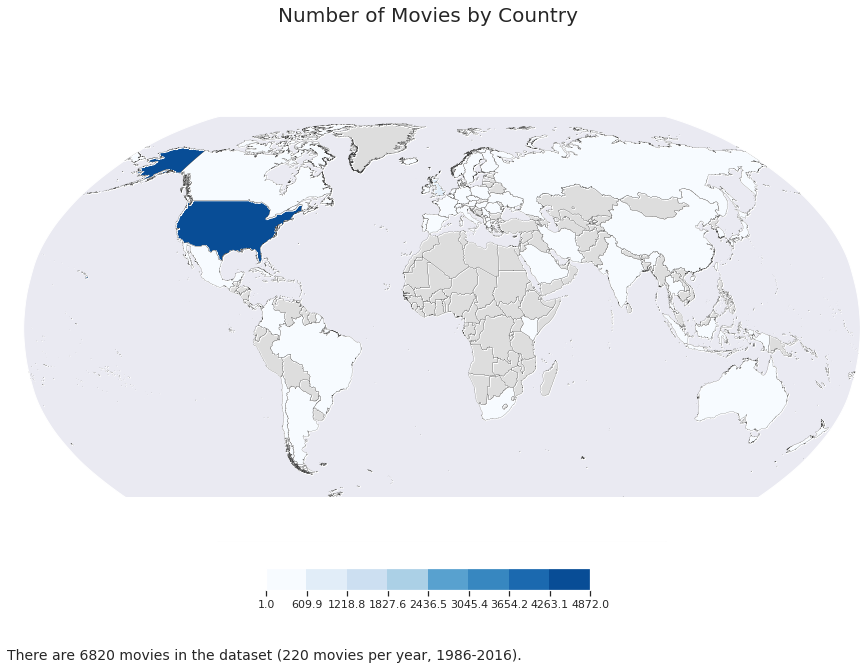

In [5]:
# Set up basic instructions
shapefile = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries'
num_colors = 9
description = '''There are 6820 movies in the dataset (220 movies per year, 1986-2016). '''.strip()
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

# Create a dataframe to store the number of movies for each country
df = pd.DataFrame()
df['movie_number'] = movies['country'].value_counts()

values = df['movie_number']
cm = plt.get_cmap('Blues')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df['bin'] = np.digitize(values, bins) - 1
df.sort_values('bin',ascending=False).head()

# Plot the map graph of the number of movies for each country
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, frame_on=False)
fig.suptitle('Number of Movies by Country', fontsize=20, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in df.index:
        color = '#dddddd'
    else:
        color = scheme[df.ix[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2) # Cover up Antarctica so legend can be placed over it.

ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3) # Draw color legend.
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction') # Set the map footer.
plt

The map shows that most of the movies we are analyzing are produced in the United States, and the others are from over 50 countries around the world. Therefore, the analysis mostly accommodate to the movie industry in the United States, whereas is only a reference for countries other than US.

## 5. Analyze Data - Factors influencing rating (score) of a movie

Now let us start to analyze the factors and potentially affect the rating of a movie. The ratings (scores) used here are mainly from iMDb.

### 5.1 Ratings over the past years

To get a better sense of the ratings over the past years, we first could construct a table to calculate the average ratings over the past years, and see what happens.

In [6]:
# Create a dataframe to store the average scores of movies over the past years. 
score_time_1 = movies.groupby(['year'])['score'].mean().reset_index()
score_time_1 = score_time_1.rename(columns={'score':'avg_score'})
score_time_1.head()

,year,avg_score
0,1986,6.119545
1,1987,6.142922
2,1988,6.223182
3,1989,6.133484
4,1990,6.236818


Based on the results from the table, it can be seen that the average ratings of movies are mainly distributed in the range from 6 to 7. To have a clearer observation, we could plot the ratings.

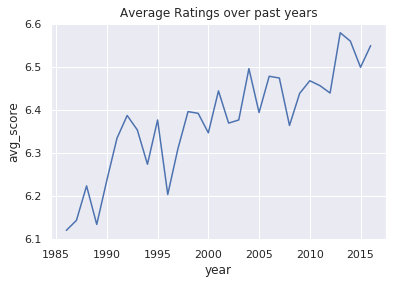

In [7]:
# Create a plot to observe the changes of rating over the past years.
ax = sns.lineplot(x=score_time_1['year'], y=score_time_1['avg_score'])
ax.set_title('Average Ratings over past years')
ax

The line plot clearly shows that the average ratings has an increasing trend over time, from 6.1 in 1985 to 6.6 today. This observation is quite interesting. This might be caused by several reasons, for example, the difference in aesthetic standards and the development of movie industry.

So what happens to different genres? Do they have various average ratings over the past years? We could now create a dataframe to calculate the average scores of each genre over the past years.

In [8]:
# Create a dataframe to store the average scores of movies over the past years. 
score_time_2 = movies.groupby(['year','genre'])['score'].mean().reset_index()
score_time_2 = score_time_2.rename(columns={'score':'avg_score'})
score_time_2.head()

,year,genre,avg_score
0,1986,Action,5.461224
1,1986,Adventure,6.337500
2,1986,Animation,6.614286
3,1986,Biography,6.557143
4,1986,Comedy,6.007692


It seems that our query makes sense, because it is true that the ratings of different genres have different growth trends over the past years. For example, the action movie has a much lower average rating all the time, whereas biography movie has a much higher average rating all the time. To have a clear observation, we could also plot the average ratings of different genres over the past years. 

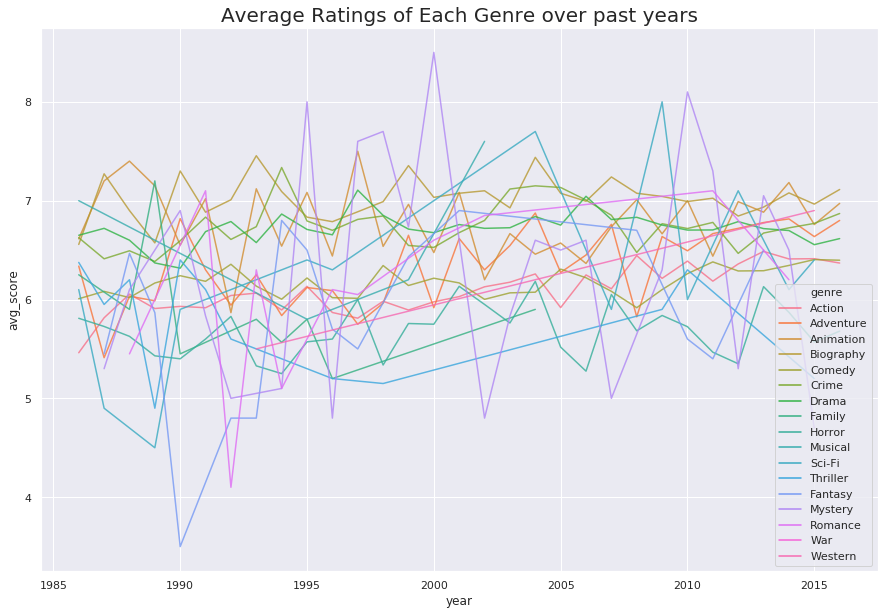

In [10]:
# Create a plot to observe the changes of rating over the past years.
fig = plt.figure(figsize=(15, 10))
ax = sns.lineplot(x=score_time_2['year'], y=score_time_2['avg_score'],
                  hue=score_time_2['genre'], alpha=0.8)
ax.set_title('Average Ratings of Each Genre over past years',fontsize=20)
ax

The line plots indicate that the average scores does varies a lot in different genres, and the volatilities also vary. It shows that mystery movies and fantasy movies have higher volatilities, whereas action and adventure movies have lower volatilities. The biography movies, drama movies, and comedy movies usually have higher average ratings over time, whereas horror movies ans musical movies might have lower average ratings all the time. Note that it seems that some data is missing around year 2000, which might affect the continuity of the line plots.

### 5.2 Ratings by Genres

Since we want to explore the relationship between genre and rating, to make our dataframe more clear, we choose three columns: genre, year, score from the dataset

In [11]:
dfs1 = movies.loc[:,['genre','year','score']]

In [12]:
dfs1.head()

,genre,year,score
0,Adventure,1986,8.1
1,Comedy,1986,7.8
2,Action,1986,6.9
3,Action,1986,8.4
4,Adventure,1986,6.9


In each decade, we first use .loc[] to filter the year of the movies. Then, we sort values by descending order to get the top 100 rating movies. We use value_count to get the counts of each genres. We use .to_frame() to convert it into dataframe. To make it easier for us to merge these result together, we use .reset_index() to reset the index and .columns[] to rename the columns.

In [13]:
top80 = dfs1.loc[dfs1['year']<1991]
top80 = top80.sort_values(by='score',ascending=False).head(100)
genre80 = top80['genre'].value_counts()
genre80 = genre80.to_frame()
genre80 = genre80.reset_index()
genre80.columns = ['genres','1980s']
genre80

,genres,1980s
0,Drama,31
1,Comedy,26
2,Crime,12
3,Adventure,10
4,Action,9
5,Biography,8
6,Animation,4


In [14]:
top90 = dfs1.loc[(dfs1['year']>=1991)&(dfs1['year']<=2000),:]
top90 = top90.sort_values(by='score',ascending=False).head(100)
genre90 = top90['genre'].value_counts()
genre90 = genre90.to_frame()
genre90 = genre90.reset_index()
genre90.columns = ['genres','1990s']
genre90

,genres,1990s
0,Drama,39
1,Crime,22
2,Comedy,10
3,Animation,10
4,Action,7
5,Biography,7
6,Adventure,3
7,Mystery,2


In [15]:
top00 = dfs1.loc[(dfs1['year']>=2001)&(dfs1['year']<=2010),:]
top00 = top00.sort_values(by='score',ascending=False).head(100)
genre00 = top00['genre'].value_counts()
genre00 = genre00.to_frame()
genre00 = genre00.reset_index()
genre00.columns = ['genres','2000s']
genre00

,genres,2000s
0,Drama,30
1,Action,17
2,Animation,14
3,Biography,11
4,Adventure,10
5,Crime,10
6,Comedy,6
7,Sci-Fi,1
8,Mystery,1


In [16]:
top10 = dfs1.loc[(dfs1['year']>=2011)&(dfs1['year']<=2020),:]
top10 = top10.sort_values(by='score',ascending=False).head(100)
genre10 = top10['genre'].value_counts()
genre10 = genre10.to_frame()
genre10 = genre10.reset_index()
genre10.columns = ['genres','2010s']
genre10

,genres,2010s
0,Drama,25
1,Action,18
2,Adventure,13
3,Animation,12
4,Biography,11
5,Comedy,11
6,Crime,10


We use .merge() to merge the four dataframes of the genres countings each decades together. Since the genres of top 100 movies each decades may not be same, we use 'outer' to merge them. Then, we will get a large table to see all the data of the top 100 movies' genres. 

In [17]:
a = pd.merge(genre80,genre90,how='outer')
b = pd.merge(genre00,genre10,how='outer')
c = pd.merge(a,b,how='outer')
allgenres = c.set_index('genres')
allgenres

,1980s,1990s,2000s,2010s
genres,,,,
Drama,31.0,39.0,30,25.0
Comedy,26.0,10.0,6,11.0
Crime,12.0,22.0,10,10.0
Adventure,10.0,3.0,10,13.0
Action,9.0,7.0,17,18.0
Biography,8.0,7.0,11,11.0
Animation,4.0,10.0,14,12.0
Mystery,NaN,2.0,1,NaN
Sci-Fi,NaN,NaN,1,NaN


In order to easily plot the tables, I use .transpose() to exchange the columns and rows.

In [18]:
allt = allgenres.transpose()
allt

genres,Drama,Comedy,Crime,Adventure,Action,Biography,Animation,Mystery,Sci-Fi
1980s,31.0,26.0,12.0,10.0,9.0,8.0,4.0,NaN,NaN
1990s,39.0,10.0,22.0,3.0,7.0,7.0,10.0,2.0,NaN
2000s,30.0,6.0,10.0,10.0,17.0,11.0,14.0,1.0,1.0
2010s,25.0,11.0,10.0,13.0,18.0,11.0,12.0,NaN,NaN


To make each line clear, we choose to plot each column separately. We use the linewidth and alpha to emphasize some important genres. We use ax.set_title() to give the title name. We use ax.set_ylabel to give the column name. We use ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) to move the legend out of the plot in order not to influence the lines in the plot.

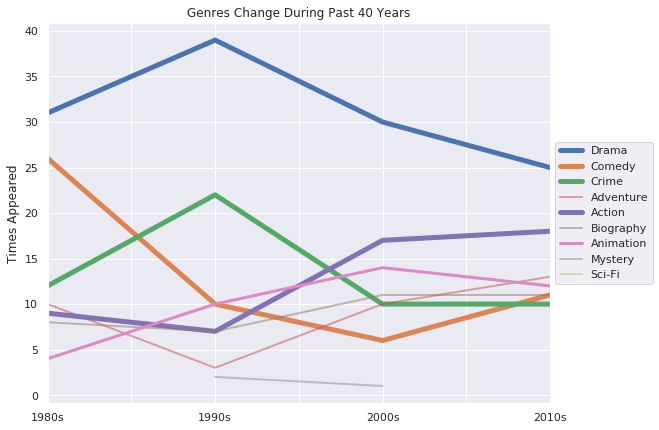

In [19]:
fig,ax = plt.subplots(figsize=(9,7))
allt['Drama'].plot(ax=ax,linewidth=5)
allt['Comedy'].plot(ax=ax,linewidth=5)
allt['Crime'].plot(ax=ax,linewidth=5)
allt['Adventure'].plot(ax=ax,linewidth=2,alpha=0.5)
allt['Action'].plot(ax=ax,linewidth=5)
allt['Biography'].plot(ax=ax,linewidth=2,alpha=0.5)
allt['Animation'].plot(ax=ax,linewidth=3)
allt['Mystery'].plot(ax=ax,linewidth=2,alpha=0.5)
allt['Sci-Fi'].plot(ax=ax,linewidth=2,alpha=0.5)
ax.set_title('Genres Change During Past 40 Years')
ax.set_ylabel('Times Appeared')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Drama (blue line) always highly appear during these four decades, however, it shows the downward sloping trend. Comedy (orange line) was a popular genre in the 1980s, but it dropped a lot so maybe nowadays it is hard to make a high-rating movie by using comedy genre. Crime (green line) was very popular in the 1990s, but it was not that popular in other decades. Action (purple line) becomes more and more popular these years. Animation (pink line) also shows a upward sloping trend.

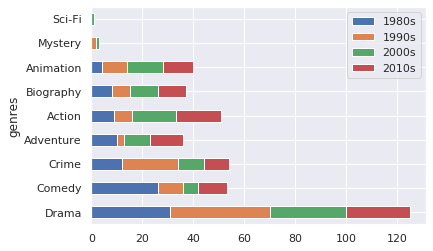

In [20]:
allgenres.plot.barh(stacked='True')

From this stacked bar plot, we can see that during these years, the most popluar genre is Drama. Then, they are Crime, Comedy, Action,and Animation

### 5.3 Ratings by Directors

Do the director influence the rating of a movie? We could answer this question by taking the average of ratings of movies directed by each director and see what happens. 

In [21]:
# Create a dataframe to store the average rating of each director
director_score_avg = movies.groupby(movies['director'])[['score']].mean().reset_index()
director_score_avg = director_score_avg.rename(columns={'score':'avg_score'})
director_score_avg.sort_values(by='avg_score',ascending=False).head()

,director,avg_score
1933,Nitesh Tiwari,8.7
168,Anurag Kashyap,8.6
1952,Olivier Nakache,8.6
1,Aamir Khan,8.5
1618,Makoto Shinkai,8.5


Based on the table, it can be seen that the average ratings of different directors do vary. To have a better observation and know the top 20 directors by the average ratings of their movies, we could construct a bar plot.

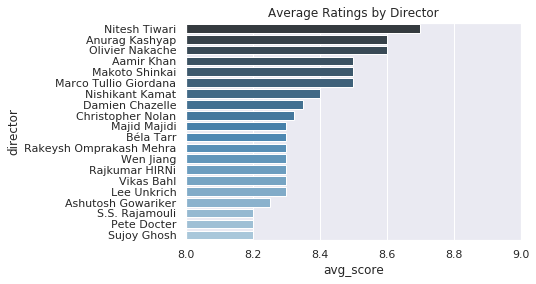

In [22]:
# Create a bar plot of average rating of each director
avg_score_top = director_score_avg.sort_values(by='avg_score',ascending=False)[:20]['avg_score']
director_top = director_score_avg.sort_values(by='avg_score',ascending=False)[:20]['director']
ax = sns.barplot(avg_score_top, y=director_top, palette="Blues_d")
ax.set_xlim([8,9])
ax.set_title('Average Ratings by Director')
ax

The horizontal bar plot clearly show that Nitesh Tiwari has a highest average ratings of 8.7, whereas other top 20 directors have average ratings from 8.2 to 8.6. Therefore, it is true that the director might affect the rating of the movie.

### 5.4 Ratings by Actors

How do the main actor of a movie affect the rating of a movie? We could create a dataframe to calculate the average ratings of movies acted by each actor.

In [24]:
# Create a table to store the average rating of each star
star_score_avg = movies.groupby(movies['star'])[['score']].mean().reset_index()
star_score_avg = star_score_avg.rename(columns={'score':'avg_score'})
star_score_avg.sort_values(by='avg_score',ascending=False).head()

,star,avg_score
64,Alexandre Rodrigues,8.7
1320,Kay Kay Menon,8.6
516,Darsheel Safary,8.5
2399,Ulrich Mühe,8.5
1516,Luigi Lo Cascio,8.5


The dataframe does suggest the impact of each star. For example, Alexandre Rodrigues has an average rating of 8.7, and Kay Kay Menon has an average rating of 8.6. To have a clearer observation of the top 20 actors with high average ratings, we could do a bar plot.

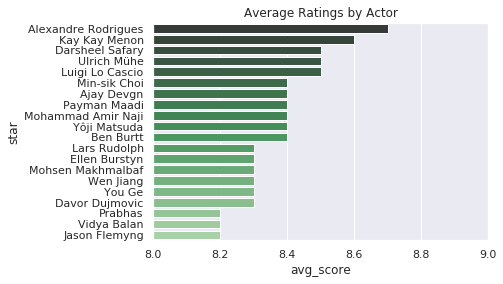

In [25]:
# Create a bar plot to show the average rating of each star
avg_score_top = star_score_avg.sort_values(by='avg_score',ascending=False)[:20]['avg_score']
star_top = star_score_avg.sort_values(by='avg_score',ascending=False)[:20]['star']
ax = sns.barplot(avg_score_top, y=star_top, palette="Greens_d")
ax.set_xlim([8,9])
ax.set_title('Average Ratings by Actor')
ax

The horizontal bar plot indicates the top 20 actors order by their average ratings of movies, with the high average rating of 8.7, and the low average rating of 8.2.

### 5.5 Ratings versus Budgets

Will the budget affect the rating? This question is quite ambiguous, so we could first construct a table, clean the unnecessary data, and analyze the useful data.

In [26]:
# Drop the movies without budget number
movies_without_zero = movies.loc[(movies['budget']!=0)]
movies_without_zero.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


After cleaning the data, we could construct a scatter plot of ratings versus budgets to see the relationship between them,

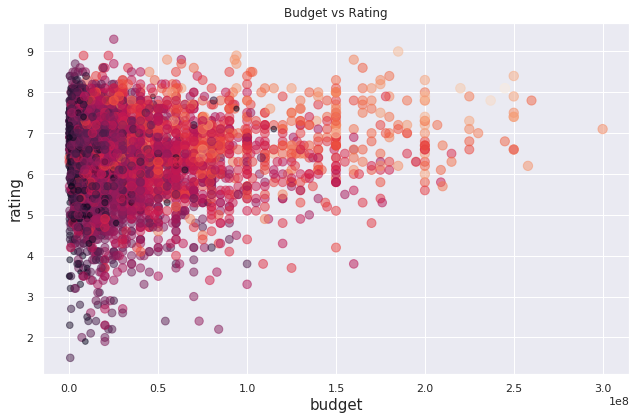

In [27]:
# Scatter plot: Rating vs Budget
volume = np.log(movies_without_zero['gross'])**1.5 # marker size
color = np.log(movies_without_zero['gross'])**5 # marker color

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(movies_without_zero['budget'], movies_without_zero['score'], s=volume, c=color, alpha=0.5)

ax.set_xlabel('budget', fontsize=15)
ax.set_ylabel('rating', fontsize=15)
ax.set_title('Budget vs Rating')

ax.grid(True)
fig.tight_layout()

plt.show()

It seems that the relationship between rating and budget is not significant because of the large variance, but it appears some positive pattern in the scatter plot. To solve the non-constant variance problem, we could try to take a log and see what happens.

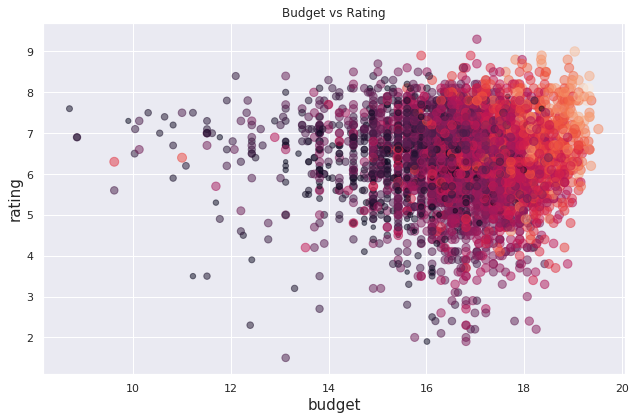

In [28]:
# Scatter plot: Rating vs Log Budget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

volume = np.log(movies_without_zero['gross'])**1.5 # marker size
color = np.log(movies_without_zero['gross'])**5 # marker color

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(np.log(movies_without_zero['budget']), movies_without_zero['score'], s=volume, c=color, alpha=0.5)

ax.set_xlabel('budget', fontsize=15)
ax.set_ylabel('rating', fontsize=15)
ax.set_title('Budget vs Rating')

ax.grid(True)
fig.tight_layout()

plt.show()

Unfortunately, the logged model does not indicate a much better situation. Therefore, we will come back to the previous model and try to plot a line to show the potential linear relationship between rating and budget. 

In [29]:
# Linear Regression: Rating vs Budget
X = np.array(movies_without_zero['budget']).reshape(-1,1)
y = np.array(movies_without_zero['score'])
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.005413916019603948

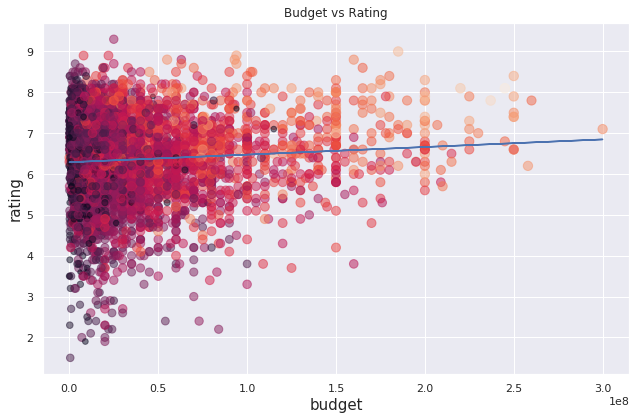

In [30]:
# Linear Regression Scatter plot: Rating vs Budget
y_hat = reg.predict(X)

volume = np.log(movies_without_zero['gross'])**1.5 # marker size
color = np.log(movies_without_zero['gross'])**5 # marker color

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(movies_without_zero['budget'], movies_without_zero['score'], s=volume, c=color, alpha=0.5)
ax.plot(movies_without_zero['budget'], y_hat, c='b')

ax.set_xlabel('budget', fontsize=15)
ax.set_ylabel('rating', fontsize=15)
ax.set_title('Budget vs Rating')

ax.grid(True)
fig.tight_layout()

plt.show()

The linear regression result tells us that the relationship between rating and budget is insignificant, with R-squared of 0.5%. This actually makes sense. Of course, the budget you use cannot directly determine the rating of the movie. It happens that movies with little budget can reach high ratings, and movies with much budget get low ratings. Therefore, the rating of the movies do not depends on the budget you use to start it, but the later process in the production of the movie.

Besides, we could also try to do the KNN analysis on the data, so we can see whether rating is predictable based on the budget input.

In [31]:
# KNN: Rating vs Budget
skl_knn = knn(n_neighbors=30).fit(movies_without_zero[['budget']].values,movies_without_zero['score'].values)
print(skl_knn.score(movies_without_zero[['budget']].values,movies_without_zero['score'].values)) # R^2
movies_without_zero['yhat_knn'] = skl_knn.predict(movies_without_zero[['budget']].values)
yhat_knn = movies_without_zero.sort_values('budget').set_index('budget')['yhat_knn']

0.012895925647418593


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


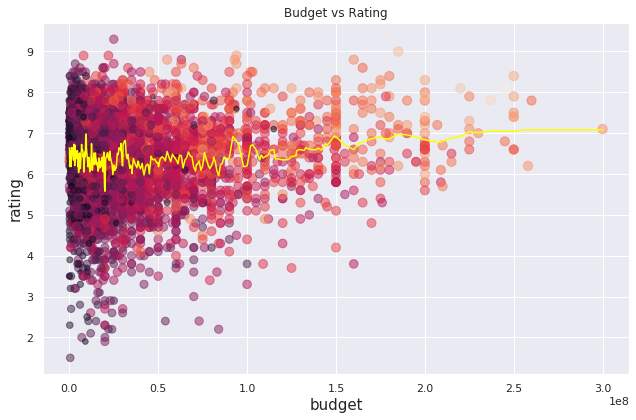

In [32]:
# KNN: scatter plot of Rating vs Budget
volume = np.log(movies_without_zero['gross'])**1.5 # marker size
color = np.log(movies_without_zero['gross'])**5 # marker color

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(movies_without_zero['budget'], movies_without_zero['score'], s=volume, c=color, alpha=0.5)
ax.plot(yhat_knn, color='yellow')

ax.set_xlabel('budget', fontsize=15)
ax.set_ylabel('rating', fontsize=15)
ax.set_title('Budget vs Rating')

ax.grid(True)
fig.tight_layout()

plt.show()

The KNN results is not very good, with fitted R-squares of 0.01. Therefore, clearly it is difficult to predict the rating based on the budget.

## 6. Analyze Data - Factors influencing gross revenue of a movie

### 6.1 Budget by Genres

From the section above, we can find the relationship between genre and ratings, and relationship between budget and ratings. What about the relationship between genre and budget? How much budget should we prepared for the different genre?

We first filter the budget which is 0 out of the frame. Then, we use .groupby() to group different genres and calculate their average budget. Then, we turn the result into dataframe.

In [33]:
budget_genre = movies.loc[movies['budget'] != 0,:]
budget_genre = budget_genre.groupby('genre')
budget_genre1 = budget_genre['budget'].mean()
budget_genre1 = budget_genre1.to_frame()
budget_genre1 = budget_genre1.reset_index()
budget_genre1

,genre,budget
0,Action,5.921049e+07
1,Adventure,5.024821e+07
2,Animation,7.781004e+07
3,Biography,2.546938e+07
4,Comedy,2.369318e+07
5,Crime,2.386503e+07
6,Drama,2.415350e+07
7,Family,1.992167e+07
8,Fantasy,1.739455e+07
9,Horror,1.439298e+07


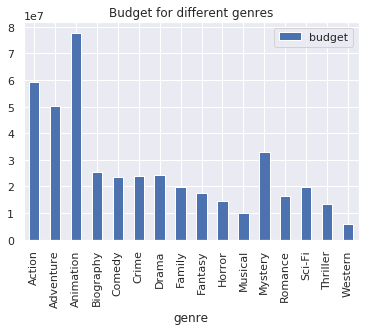

In [34]:
fig,ax = plt.subplots()
budget_genre1.plot.bar(ax=ax,x='genre',y='budget')
ax.set_title('Budget for different genres')
ax

We can see that animation's budget rank first. Animation, action, adventure, and mystery require obviously more budget than the other genres. The rest genres have relatively lower budget. This means that only if the companies or studios have enough high budget, they can choose the four high budget genres. Then, we calculate the standard deviation of the budget.

In [35]:
bg00 = budget_genre['budget'].std()
bg00

genre
Action       5.293133e+07
Adventure    4.908805e+07
Animation    5.278572e+07
Biography    2.078478e+07
Comedy       2.118320e+07
Crime        2.132378e+07
Drama        2.452800e+07
Family       1.006523e+07
Fantasy      2.482356e+07
Horror       1.374253e+07
Musical               NaN
Mystery      3.289753e+07
Romance      1.938216e+07
Sci-Fi       2.181795e+07
Thriller     6.943651e+06
Western      5.656854e+06
Name: budget, dtype: float64

Since the budget of Musical is less than two rows, which will return Nan if I calculate the standard deviation. So I fill the NaN will its last statistic, which make the standard deviation same as the average.

In [36]:
budget_genre2 = budget_genre['budget'].std().fillna(budget_genre['budget'].last())
budget_genre2 = budget_genre2.to_frame()
budget_genre2 = budget_genre2.reset_index()
budget_genre2.columns = ['genre','budget_std']
budget_genre2

,genre,budget_std
0,Action,5.293133e+07
1,Adventure,4.908805e+07
2,Animation,5.278572e+07
3,Biography,2.078478e+07
4,Comedy,2.118320e+07
5,Crime,2.132378e+07
6,Drama,2.452800e+07
7,Family,1.006523e+07
8,Fantasy,2.482356e+07
9,Horror,1.374253e+07


We make the two plot together. The bar graph is the average budget and the line graph is the standard deviation of the budget.

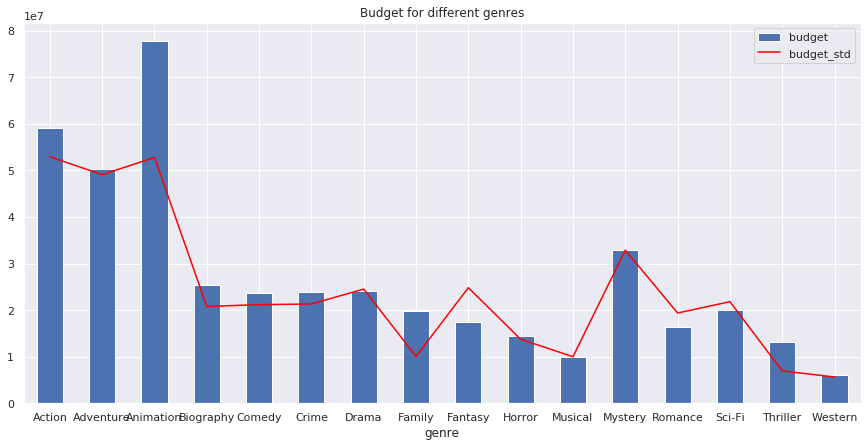

In [37]:
fig,ax = plt.subplots(figsize=(15,7))
budget_genre1.plot.bar(ax=ax,x='genre',y='budget')
budget_genre2.plot.line(ax=ax,x='genre',y='budget_std',c='red')
ax.set_title('Budget for different genres')
ax.set_xlim([-0.5,15.5])
ax

In this plot, we can find that animation's standard deviation is much lower than its average budget, which means that the most animation's budget is clustered at the mean. This also prove that animation requires high budget. Also, action, family, thriller's budget standard deviation are lower than the average budget. Fantasy, sci-fi and romance's budget is higher than the average budget, which means that the budget may spread out the budget, while they are quite close to average. For the rest of the genres, their budget standard deviation is quite close to the average budget. So it is clear to predict the budget by this way.

### 6.2 Gross Revenue versus Budget

The budget is an important limitation in movie making. Within a limited budget, it is crucial for producers to have an understanding of the revenue they could possibly achieve to allocate limited resources. The analysis below explores the linear relationship between budget and gross revenue, aiming at improving one's movie making decision process. 

In [38]:
mdf = pd.read_csv('movies.csv').drop(['Unnamed: 6', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'], axis=1)
mdf.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,063,875","$1,045,663,875"
2,3,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,403,013,963"
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,068,223,624"
4,5,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,359,754"


We begin by data cleaning and data type transformation.We transform production_budget, worldwide_gross and domestic gross from object into float, and we drop missing data (represented by 0 in the original dataset) and duplicate rows.

In [39]:
mdf['worldwide_gross'] = mdf['worldwide_gross'].str.replace(',','').str.replace('$','').str.replace('\xa0','')
mdf['production_budget'] = mdf['production_budget'].str.replace(',','').str.replace('$','').str.replace('\xa0','')
mdf['domestic_gross'] = mdf['domestic_gross'].str.replace(',','').str.replace('$','').str.replace('\xa0','')
mdf[['domestic_gross','production_budget','worldwide_gross']]=mdf[['domestic_gross','production_budget','worldwide_gross']].apply(pd.to_numeric,errors='coerce')

In [40]:
mdf.dtypes

id                    object
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [41]:
mbudget = mdf.loc[(mdf['production_budget']!=0.0)  & (mdf['worldwide_gross']!=0.0 ),:].drop_duplicates()
mbudget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.797801e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241063875.0,1.045664e+09
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.403014e+09
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.068224e+09
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048360e+09


First, we plot the relationship between production budget and worldwide gross. After we exclude the outliers (extremely high budget/gross movies), now there seems to be a linear relationship.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

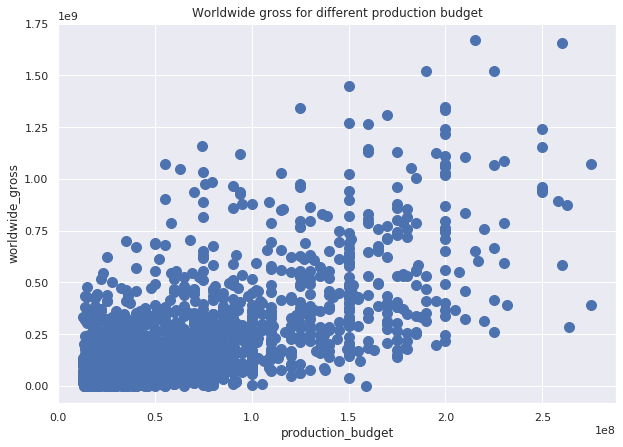

In [42]:
mbudget[['production_budget','worldwide_gross']][(mbudget['worldwide_gross']<2e9)&(mbudget['production_budget']<3e8)].plot.scatter(x='production_budget', y='worldwide_gross',s=100,figsize=(10,7))
plt.title('Worldwide gross for different production budget')
plt

 Now we run linear regression on production budget and worldwide gross. 

In [43]:
from sklearn.linear_model import LinearRegression
X = np.array(mbudget['production_budget'][:3350]).reshape(-1,1)
y = np.array(mbudget['worldwide_gross'][:3350])
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.5182078311324695

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

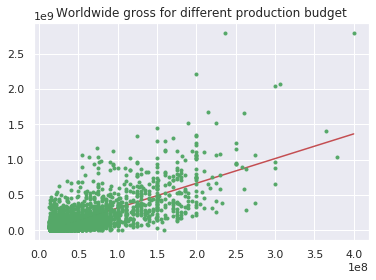

In [44]:
y_hat=reg.predict(X)
plt.plot(X,y_hat,'r')
plt.plot(X,y,'g.')
plt.title('Worldwide gross for different production budget')
plt

The prediction score is 52%. This shows that although there is a linear relationship between budget and gross revenue, several possible improvements still exist:
* There are still outliers in dataset as we can see in the plot above
* There are other features that determine the gross such as director, main actors, time of release,genre etc.


Applications:
The regression function we get is:
##### y_hat = 3.50 x - 32156827.50
This is a simple estimation of the possible revenue given the budget (x).For instance, given 100 million budget,the regression function predicts that the film might earn 317.84 million. If 10 million extra investment is given to the company, we might earn 2.84 million more gross revenue. 

### 6.3 Gross Revenue by Directors

How the director affect the gross revenue of the movie? This is a crucial question that the investor need to consider when deciding whether to invest and how much money to invest to the movie project. We could first create a dataframe to calcualte the total gross revenue that each director earned. Before that, we need to clean the data to make sure the data we use are useful.

In [45]:
# Drop the movies without gross number
movies_without_zero = movies.loc[(movies['gross']!=0)]
movies_without_zero.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


After cleaning the data, we could now calculate the total revenue of movies directed by each director.

In [46]:
# Create a table to store the total revenue of each director
director_gross_total = movies_without_zero.groupby(movies_without_zero['director'])[['gross']].sum().reset_index()
director_gross_total = director_gross_total.rename(columns={'gross':'total_gross'})
director_gross_total.sort_values(by='total_gross',ascending=False).head()

,director,total_gross
2488,Steven Spielberg,2.890693e+09
1760,Michael Bay,2.196162e+09
2045,Peter Jackson,2.134382e+09
1066,James Cameron,1.909927e+09
440,Christopher Nolan,1.816485e+09


To have a clear observation, we could construct a horizontal bar plot to see the total revenue of each director.

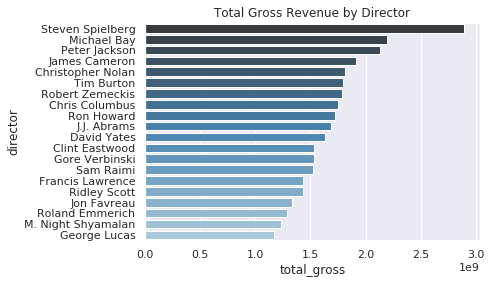

In [47]:
# Create a bar plot to show the total revenue of each director
total_gross_top = director_gross_total.sort_values(by='total_gross',ascending=False)[:20]['total_gross']
director_top = director_gross_total.sort_values(by='total_gross',ascending=False)[:20]['director']
ax = sns.barplot(total_gross_top, y=director_top, palette="Blues_d")
ax.set_title('Total Gross Revenue by Director')
ax

The horizontal bar plot clearly show the top 20 directors by the total gross revenue of movies. It shows that compare to other directors, Steven Spielberg earned much higher total gross revenue, with approximately 3 billion dollars. The other top directors earned from 1 billion to 2.5 billion.

However, the data we get is the total amount, and the total amount is closely related to the number of movies directed by each director. Therefore, we need to take the total amount of movies directed by each director into consideration. Here is the table that calculates the number of movies directed by each director.

In [48]:
# Number of movies of each director
director_movie_number = movies_without_zero.groupby('director')[['gross']].count().reset_index()
director_movie_number = director_movie_number.rename(columns={'gross':'movies_num'})
director_movie_number.sort_values(by='movies_num',ascending=False).head()

,director,movies_num
2724,Woody Allen,33
459,Clint Eastwood,24
2488,Steven Spielberg,21
2487,Steven Soderbergh,21
2268,Ron Howard,20


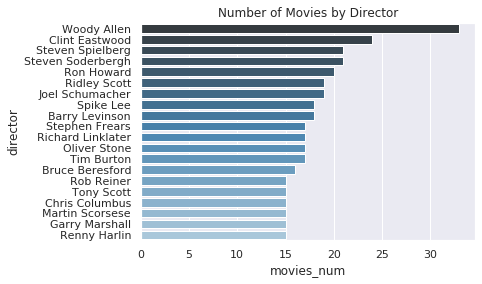

In [49]:
# Create a bar plot to show the number of movies of each director
movie_number_top = director_movie_number.sort_values(by='movies_num',ascending=False)[:20]['movies_num']
director_top = director_movie_number.sort_values(by='movies_num',ascending=False)[:20]['director']
ax = sns.barplot(movie_number_top, y=director_top, palette="Blues_d")
ax.set_title('Number of Movies by Director')
ax

The horizontal bar plots indicate that it is true that the number of movies might affect the total gross revenue that we calculated before. For example, Woody Allen directed over 30 movies in the past years, much higher than other directors. The other top 20 directors directed 15 to 25 movies in total in the past years.

Now we should think about taking the average gross revenue of the movies directed by each director to get a more appropriate way to rank the directors. We could now create a dataframe to calculate the average gross revenue that each predictor earned.

In [50]:
# Average revenue of each director
director_gross_avg = movies_without_zero.groupby(movies_without_zero['director'])[['gross']].mean().reset_index()
director_gross_avg = director_gross_avg.rename(columns={'gross':'avg_gross'})
director_gross_avg.sort_values(by='avg_gross',ascending=False).head()

,director,avg_gross
1557,Lee Unkrich,4.150049e+08
885,George Lucas,3.884943e+08
2574,Tim Miller,3.630707e+08
1037,J.J. Abrams,3.368410e+08
1520,Kyle Balda,3.360458e+08


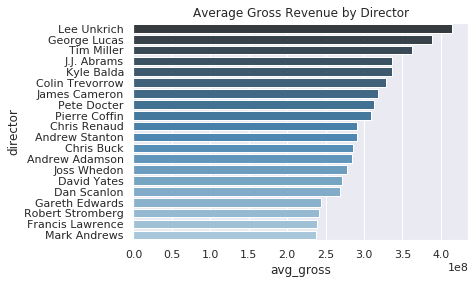

In [51]:
# Create a bar plot to show the average gross revenue of each director
gross_avg_top = director_gross_avg.sort_values(by='avg_gross',ascending=False)[:20]['avg_gross']
director_top = director_gross_avg.sort_values(by='avg_gross',ascending=False)[:20]['director']
ax = sns.barplot(gross_avg_top, y=director_top, palette="Blues_d")
ax.set_title('Average Gross Revenue by Director')
ax

The horizontal bar plot indicates that Lee Unkrich is the director that earned the highest average gross revenue in the past years, with the average gross of higher than 4 billion dollars. Whereas the other top directors earned approximately 2.5 billion to 4 billion dollars gross revenue. Therefore, it shows that there exists a relationship between the gross revenue of a movie and its director.

### 6.4 Gross Revenue by Actors

Do the main actor affect the gross revenue of a movie? It seems to be true, because normally the salary of the star and the revenue the star might generate are important factors that the investors consider when making the investment to the movie. We could first clean the table to drop the unnecessary rows to make sure all the data are useful.

In [52]:
# Drop the movies without gross number
movies_without_zero = movies.loc[(movies['gross']!=0)]
movies_without_zero.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


Then, like what we did when analyzing the relationship between the gross revenue and directors, we could start with creating a dataframe to calculate the total gross revenue that an actor earned.

In [53]:
# Total revenue of each star
star_gross_total = movies_without_zero.groupby(movies_without_zero['star'])[['gross']].sum().reset_index()
star_gross_total = star_gross_total.rename(columns={'gross':'total_gross'})
star_gross_total.sort_values(by='total_gross',ascending=False).head()

,star,total_gross
2351,Tom Hanks,3.973406e+09
2345,Tom Cruise,3.117511e+09
2001,Robert Downey Jr.,2.708959e+09
2462,Will Smith,2.657757e+09
1182,Johnny Depp,2.512278e+09


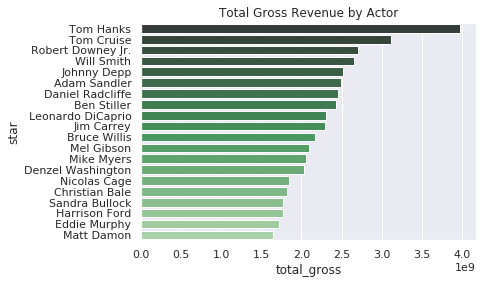

In [54]:
# Create a bar plot to show the total gross revenue of each star
tips = sns.load_dataset("tips")
gross_total_top = star_gross_total.sort_values(by='total_gross',ascending=False)[:20]['total_gross']
star_top = star_gross_total.sort_values(by='total_gross',ascending=False)[:20]['star']
ax = sns.barplot(gross_total_top, y=star_top, palette="Greens_d")
ax.set_title('Total Gross Revenue by Actor')
ax

The bar plot of the total gross revenue by actor shows that Tom Hanks earned the most in the past years, with a total gross revenue of approximately 4 billion dollars. The other top actors contributed from 1.5 billion dollars to 3 billion dollars total gross revenue.

Similar to the previous analysis, we now need to consider the total number of movies that each actor acted in the past years. We need to create a table to calculate the number of movies by actors.

In [55]:
# Number of movies of each star
star_movie_number = movies_without_zero.groupby('star')[['gross']].count().reset_index()
star_movie_number = star_movie_number.rename(columns={'gross':'movies_num'})
star_movie_number.sort_values(by='movies_num',ascending=False).head()

,star,movies_num
1784,Nicolas Cage,42
2000,Robert De Niro,38
567,Denzel Washington,36
2351,Tom Hanks,35
304,Bruce Willis,33


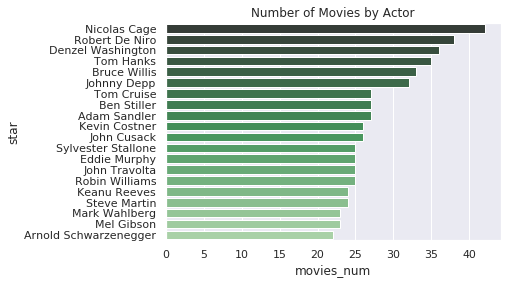

In [56]:
# Create a bar plot to show the total gross revenue of each star
tips = sns.load_dataset("tips")
movies_num_top = star_movie_number.sort_values(by='movies_num',ascending=False)[:20]['movies_num']
star_top = star_movie_number.sort_values(by='movies_num',ascending=False)[:20]['star']
ax = sns.barplot(movies_num_top, y=star_top, palette="Greens_d")
ax.set_title('Number of Movies by Actor')
ax

The bar plot shows that Nicolas Cage filmed over 40 movies in total, whereas other actors filmed from 20 to 40 movies in total. Therefore, we need to think about that when answering the relationship between gross revenue and actors.

We should use the average gross revenue now to capture the relationship better. The datafram below calculates the average gross revenue that each actor earned in the past.

In [57]:
# Average revenue of each star
star_gross_avg = movies_without_zero.groupby(movies_without_zero['star'])[['gross']].mean().reset_index()
star_gross_avg = star_gross_avg.rename(columns={'gross':'avg_gross'})
star_gross_avg.sort_values(by='avg_gross',ascending=False).head()

,star,avg_gross
475,Daisy Ridley,936662225.0
404,Chris Pratt,414402639.0
1506,Louis C.K.,368384330.0
1771,Neel Sethi,364001123.0
461,Craig T. Nelson,261441092.0


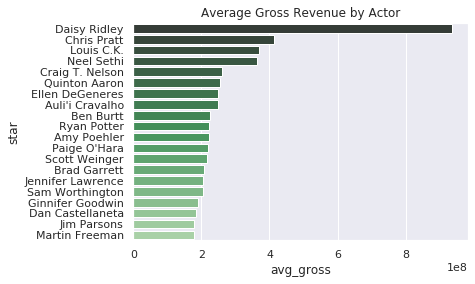

In [58]:
# Create a bar plot to show the average gross revenue of each star
tips = sns.load_dataset("tips")
gross_avg_top = star_gross_avg.sort_values(by='avg_gross',ascending=False)[:20]['avg_gross']
star_top = star_gross_avg.sort_values(by='avg_gross',ascending=False)[:20]['star']
ax = sns.barplot(gross_avg_top, y=star_top, palette="Greens_d")
ax.set_title('Average Gross Revenue by Actor')
ax

Surprisingly, now the bar plot shows a totally different result. Daisy Ridley now becomes the actor that generated most average gross revenue, with the value of close of 1 billion dollars, whereas other actors earned from approximately 200 million dollars to 400 million dollars. Therefore, the main actor of the movie does impact the gross revenue of the movie.

### 6.5 Gross Revenue by genres

In this section, we will explore the gross revenue of each genre. We first exclude the gross which is 0 out of the dataframe, and group it by genre. Then, we calculate the average gross revenue of each genre.

In [59]:
gross_genre = movies.loc[movies['gross'] != 0,:].groupby('genre')
gross_genre1 = gross_genre['gross'].mean()
gross_genre1 = gross_genre1.to_frame()
gross_genre1 = gross_genre1.reset_index()
gross_genre1

,genre,gross
0,Action,5.619281e+07
1,Adventure,5.330381e+07
2,Animation,9.148810e+07
3,Biography,2.400425e+07
4,Comedy,2.574203e+07
5,Crime,1.957440e+07
6,Drama,1.745472e+07
7,Family,8.436443e+06
8,Fantasy,2.014541e+07
9,Horror,2.569620e+07


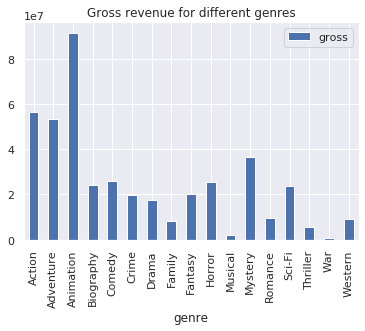

In [60]:
fig,ax = plt.subplots()
gross_genre1.plot.bar(ax=ax,x='genre',y='gross')
ax.set_title('Gross revenue for different genres')
ax

In this plot, animation has obviously higher gross revenue than the other genres.Although animation requires high budget, it may return high gross revenue. Action, adventure, and mystery have high gross revenue.Compared to other genres, musical and war have the lowest gross revenue. Also, we calculated the standard deviation of the gross revenue.

In [61]:
gross_genre2 = gross_genre['gross'].std()
gross_genre2 = gross_genre2.to_frame()
gross_genre2 = gross_genre2.reset_index()
gross_genre2.columns = ['genre','gross_std']
gross_genre2

,genre,gross_std
0,Action,8.364603e+07
1,Adventure,8.102622e+07
2,Animation,9.697904e+07
3,Biography,3.689086e+07
4,Comedy,3.742141e+07
5,Crime,2.985027e+07
6,Drama,3.665703e+07
7,Family,8.047000e+06
8,Fantasy,2.861964e+07
9,Horror,2.895057e+07


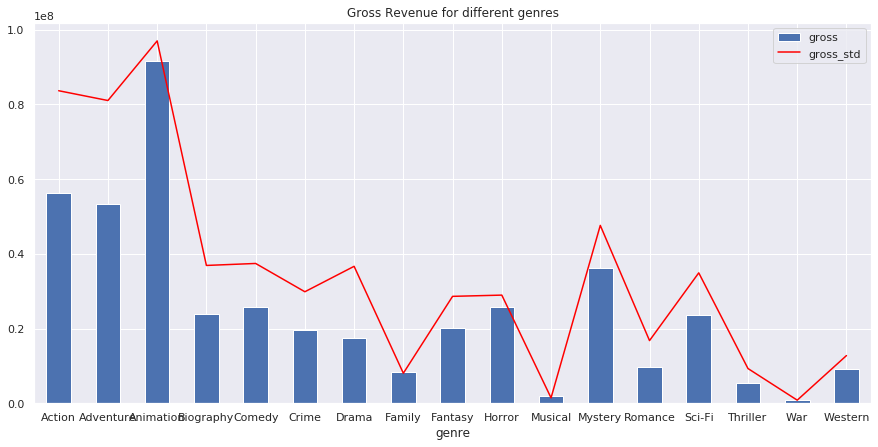

In [62]:
fig,ax = plt.subplots(figsize=(15,7))
gross_genre1.plot.bar(ax=ax,x='genre',y='gross')
gross_genre2.plot.line(ax=ax,x='genre',y='gross_std',c='red')
ax.set_title('Gross Revenue for different genres')
ax.set_xlim([-0.5,16.5])
ax

From this plot, we can see that almost all the genres' gross revenue standard deviation is higher than the average gross revenue, which means that they are all spread out of the average. So maybe genres is not a good measurement of the gross revenue.
However, we can still find out that animation, horror's standard deviation is quite close to the average, which hints that the average gross revenue is reliable. And the family, musical and war's standard deviation is the same as the average gross. Maybe the data of these three genres are not enough.

### 6.6 Gross Revenue by years and months

The movie industry is fluctuating over time and the successfulness of a movie depends much more than just the budgets, directors, actors and genre. The analysis below aims to show how the time and year of releasing a film influence the revenue level of a film. The result will provide important guidance of when to release the films for both famous and new directors. 

First, we extract columns 'year' and 'month' from column release time. Then we plot the average worldwide gross by year. 

In [63]:
mdf['year']=mdf['release_date'].str[-4:]
mdf['month']=mdf['release_date'].str.split().str[0]
mdf['month'][mdf['month'].str[0]=='1']=np.nan
mdf[['year']]=mdf[['year']].apply(pd.to_numeric,errors='ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
myearly = mdf.groupby(['year']).mean()[:-3].reset_index()
myearly.head()

,year,production_budget,domestic_gross,worldwide_gross
0,1956,13500000.0,85400591.0,85434516.0
1,1959,15000000.0,73000000.0,73259017.0
2,1962,17000000.0,25587692.5,41837692.5
3,1963,29500000.0,33500000.0,40500000.0
4,1964,18000000.0,38375000.0,38410818.0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

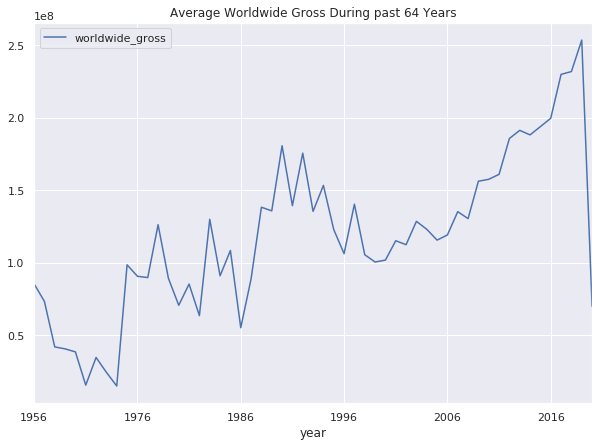

In [65]:
myearly.plot(x='year',y='worldwide_gross',figsize=(10,7))
plt.title('Average Worldwide Gross During past 64 Years')
plt

We can see that:
* The worldwide movie gross is experiencing a continuous growth in the 21st century (ignoring inflation). 
* Until April, year 2020 has suffered from the pandemic and it will not reach the expected growth. This depression might persist. 
The implication is clear: do not release your film in a bad movie year such as this year. 

Now we plot the average worldwide gross by month and the standard deviation. 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

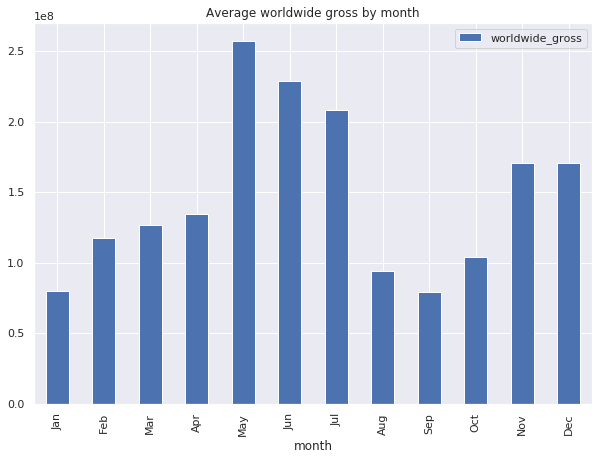

In [66]:
mmonthly = mdf.groupby(['month']).mean()[:-1].reset_index()
mmonthly['count']=[4,8,12,2,1,7,6,3,5,11,10,9]
mmonthly=mmonthly.sort_values(by='count')
mmonthly.plot.bar(x='month',y='worldwide_gross',figsize=(10,7))
plt.title('Average worldwide gross by month')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

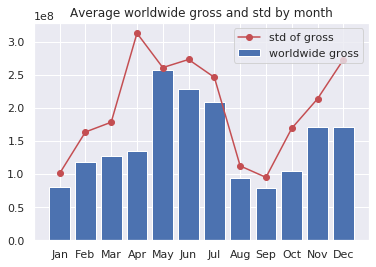

In [67]:
mbudget = mdf.loc[(mdf['production_budget']!=0.0)  & (mdf['worldwide_gross']!=0.0 ),:].drop_duplicates()
std_gross_may=mbudget['worldwide_gross'][mbudget['month']=='May'].std()
std_gross_sep=mbudget['worldwide_gross'][mbudget['month']=='Sep'].std()
std_gross_nov=mbudget['worldwide_gross'][mbudget['month']=='Nov'].std()
std_gross_jul=mbudget['worldwide_gross'][mbudget['month']=='Jul'].std()
std_gross_jan=mbudget['worldwide_gross'][mbudget['month']=='Jan'].std()
std_gross_feb=mbudget['worldwide_gross'][mbudget['month']=='Feb'].std()
std_gross_mar=mbudget['worldwide_gross'][mbudget['month']=='Mar'].std()
std_gross_apr=mbudget['worldwide_gross'][mbudget['month']=='Apr'].std()
std_gross_jun=mbudget['worldwide_gross'][mbudget['month']=='Jun'].std()
std_gross_aug=mbudget['worldwide_gross'][mbudget['month']=='Aug'].std()
std_gross_oct=mbudget['worldwide_gross'][mbudget['month']=='Oct'].std()
std_gross_dec=mbudget['worldwide_gross'][mbudget['month']=='Dec'].std()
std=[std_gross_jan,std_gross_feb,std_gross_mar,std_gross_apr,std_gross_may,std_gross_jun,std_gross_jul,std_gross_aug,std_gross_sep,std_gross_oct,std_gross_nov,std_gross_dec]
plt.bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],mmonthly['worldwide_gross'])
plt.plot(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],std,'r-o')
plt.title('Average worldwide gross and std by month')
plt.legend(['std of gross','worldwide gross'])
plt

We can see that:
* The best selling months are May, June and July which are summer holiday times. Right after that are the lowest selling months: Sep, Oct, Nov.This gives a hint for movie producers when they decide on releasing time. 
* High gross usually means it is a competitive time that less famous directors should avoid. The best choice should be times with relatively high gross and low std. Thus, May and July are good choices for famous directors; November, February and March are less competitve and moderately profitable for new directors. April is the worst choice for all.

## 7. Analyze Data - Extended analysis

### Gross Revenue versus Income per capita

What else factors can affect the gross revenue? An interesting one might be the real disposable income per capita, or put it simply - income. It is reasonable to discuss the relationship between gross revenue and income. This is because that the gross revenue is closely related to the number of audiences and the willingness people would pay for the movie, which means that the income affect the people's ability of consumption, and thus affect the gross revenue of the movie.

Let us first import the csv file with income data.

In [68]:
# Import the ppp file into the project.
ppp = pd.read_csv('fredgraph.csv')
ppp['year'] = pd.to_numeric(ppp['DATE'].str[:4])

Then we need to clean the movies data, omitting the rows without gross values.

In [69]:
# Drop the movies without gross number
movies_without_zero = movies.loc[(movies['gross']!=0)]
movies_without_zero.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


After that, we need to calculate the average gross revenue per year. The reason why we use average value here is because that it can better reflect the true gross revenue of a movie by year, rather than the total movie industry. Since we are analyzing how to make a movie profitable, it is important for us to consider the gross revenue at the individual level, rather than the whole industry level.

In [70]:
# Calculate average gross per year
gross_year = movies.groupby('year')['gross'].mean().reset_index()
gross_year.head()

,year,gross
0,1986,1.428063e+07
1,1987,1.540484e+07
2,1988,1.619822e+07
3,1989,1.851914e+07
4,1990,2.017644e+07


Then we need to inner join this two files based on the year variable, and then create a new dataframe that contains the average gross revenue and the income data.

In [71]:
# Merge the two files
merge = gross_year.merge(ppp, left_on='year', right_on='year', how='inner')[['year','gross','income']]
merge.head()

,year,gross,income
0,1986,1.428063e+07,25219.50000
1,1987,1.540484e+07,25547.16667
2,1988,1.619822e+07,26506.83333
3,1989,1.851914e+07,27027.66667
4,1990,2.017644e+07,27250.66667


To have a better observation of the trend of the gross revenue of movies, we could construct a line graph.

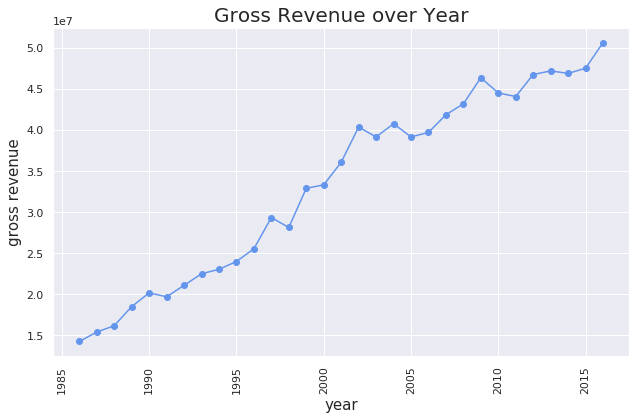

In [72]:
# Line Graph/Scatter Plot: Gross Revenue VS Year
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(merge['year'], merge['gross'],c='cornflowerblue')
ax.plot(merge['year'], merge['gross'],c='cornflowerblue')

ax.set_xlabel('year', fontsize=15)
ax.set_ylabel('gross revenue', fontsize=15)
ax.set_title('Gross Revenue over Year',fontsize=20)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

fig.tight_layout()

plt.show()

The line graph shows that the average gross revenue of movies increased over time, from 15 million dollars in 1986 to 50 million dollars in 2016. This suggests that the movie industry tends to further grow in the future.

We could also construct a line graph to observe the income changes over years.

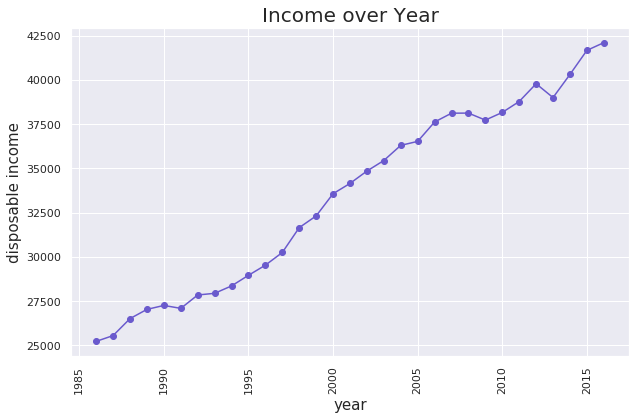

In [73]:
# Line Graph/Scatter Plot: PPP VS Year
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(merge['year'], merge['income'],c='slateblue')
ax.plot(merge['year'], merge['income'],c='slateblue')

ax.set_xlabel('year', fontsize=15)
ax.set_ylabel('disposable income', fontsize=15)
ax.set_title('Income over Year',fontsize=20)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

fig.tight_layout()

plt.show()

The line graph shows that the income increased over year, from 25000 dollars in 1986 to over 40000 dollars in 2016. This indicates that the income also tends to increase in the future.

Now we can build a linear regression model between gross revenue and income. 

In [74]:
# Linear Regression: Gross Revenue VS PPP (Income)
X = np.array(merge['income']).reshape(-1,1)
y = np.array(merge['gross'])
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9770268100273165

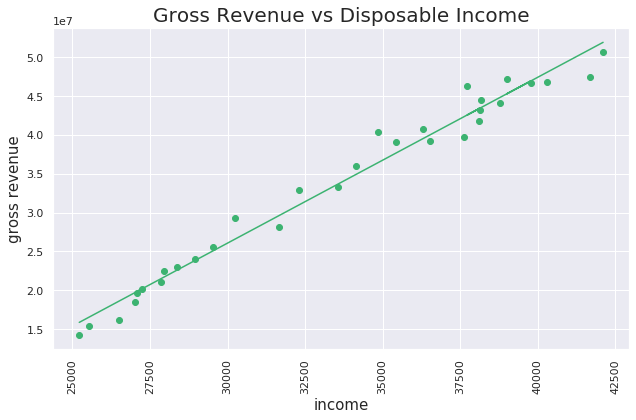

In [75]:
# Line Graph/Scatter Plot: Gross Revenue VS PPP
y_hat=reg.predict(X)

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X, y,c='mediumseagreen')
ax.plot(X, y_hat,c='mediumseagreen')

ax.set_xlabel('income', fontsize=15)
ax.set_ylabel('gross revenue', fontsize=15)
ax.set_title('Gross Revenue vs Disposable Income', fontsize=20)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

fig.tight_layout()

plt.show()

The results show that the regression is statistically significant, with the R-squared of 0.98. The scatter plot also shows a straight linear relationship between gross revenue and income. Therefore, the increase in income does affect the gross revenue of the movie. And based on the trend reflected in the plots, it can be predicted that the income will increase in the future, thus it might significantly affect the gross revenue, leading to a higher average gross revenue of movies.

### ROI vs Gross Revenue

ROI measures the profitability. From the table below, we can see that the most profitable movies usually have low budget (Home Alone which was filmed in door with children actor, black swan with one actress as two characters etc.), and of course high gross.

In [76]:
mdf['ROI']=(mdf['worldwide_gross']-mdf['production_budget'])/mdf['production_budget']
mbudget = mdf.loc[(mdf['production_budget']!=0.0)  & (mdf['worldwide_gross']!=0.0 ),:].drop_duplicates()

In [77]:
mbudget.sort_values(by='ROI',ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,ROI
3103,"3,104","Nov 16, 1990",Home Alone,15000000.0,285761243.0,476684675.0,1990,Nov,30.778978
3288,"3,289","Mar 23, 1990",Pretty Woman,14000000.0,178406268.0,432645872.0,1990,Mar,29.903277
3108,"3,109","Nov 26, 2010",The King’s Speech,15000000.0,138797449.0,430821168.0,2010,Nov,27.721411
3290,"3,291","Nov 12, 2008",Slumdog Millionaire,14000000.0,141330703.0,383825427.0,2008,Nov,26.416102
3366,"3,367","Dec 3, 2010",Black Swan,13000000.0,106954678.0,331266710.0,2010,Dec,24.482055


Now we want to see whether high revenue means high profitability. 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

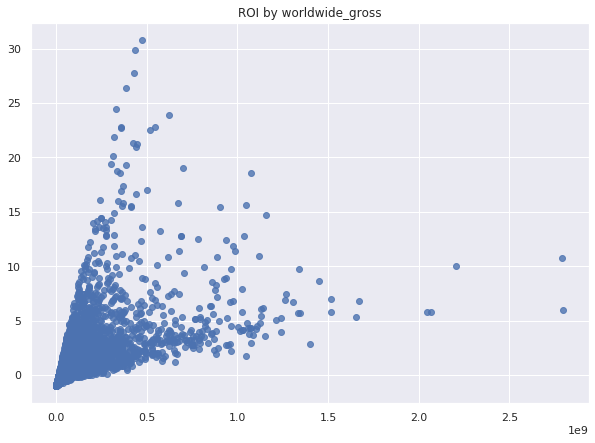

In [78]:
plt.figure(figsize=(10,7))
plt.scatter(mbudget['worldwide_gross'],mbudget['ROI'],alpha=0.8)
plt.title('ROI by worldwide_gross')
plt

In [79]:
reg = smf.ols("Q('ROI') ~ Q('worldwide_gross')", mbudget).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q('ROI')   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 12 May 2020   Prob (F-statistic):          3.51e-231
Time:                        07:15:59   Log-Likelihood:                -8056.2
No. Observations:                3363   AIC:                         1.612e+04
Df Residuals:                    3361   BIC:                         1.613e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6980      0.055     12.621      0.000       0.590       0.806
Q('worldwide_gross')  7.263e-09   2.06e-10     35.185      0.000    6.86e-09    7.67e-09
==============================================================================
Omnibus:                     2612.613   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71265.396
Skew:                           3.487   Prob(JB):                         0.00
Kurtosis:                      24.447   Cond. No.                     3.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
X = np.array(mbudget['worldwide_gross'][(mbudget['worldwide_gross']<0.5e9)  & (mbudget['ROI']<10)][:3350]).reshape(-1,1)
y = np.array(mbudget['ROI'][(mbudget['worldwide_gross']<0.5e9) & (mbudget['ROI']<10)][:3350])
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.36746183999547494

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

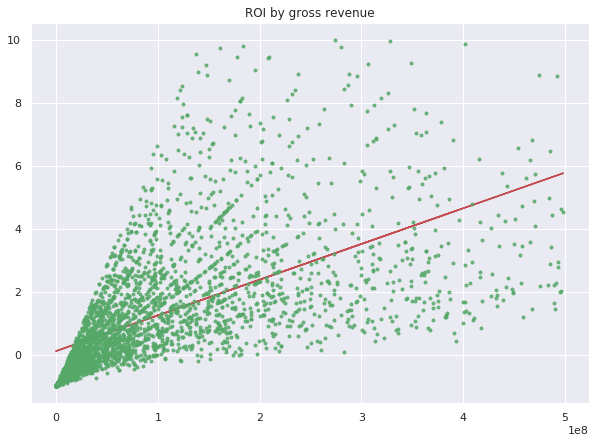

In [81]:
y_hat=reg.predict(X)
plt.figure(figsize=(10,7))
plt.plot(X,y_hat,'r')
plt.plot(X,y,'g.',alpha=0.8)
plt.title('ROI by gross revenue')
plt

From our regression result, we can see that gross revenue alone can hardly define profitability. We believe budget also plays a significant role. However, for young and new directors, it is more important to gain fame instead of a one-time profit. In this case, gross revenue is a better indicator for popularity since only high revenue means that many people have seen the film. 

## Conclusion

After our analysis on rating and gross revenue, we have found many interesting factors that influence the success of a movie. In the first part, we have seen that some directors and actors can highly increase the rating of a movie. Then we found that the most popular genre is drama, and action movies are getting increasingly high ratings. Finally, the budget has no clear influence on movie ratings. To increase rating of a movie, the producer should focus on choosing the most popular actors and directors. On the other hand, from the perspective of a new and less popular director, he/she should focus on choosing the popular genre and famous actors. Although it is costly to choose the famous cast, if the goal of the new director is to maximize rating and popularity instead of one-time gross, then the right cast is the best choice.

In the second part, we analyzed the factors of the high-grossing movies. We found that releasing time highly influences the gross revenue. The highest revenue appears during the summer holiday times while the lowest time is autumn. We also noticed that high revenue always comes with high competition (high standard deviation). Thus, we recommend the producer working with a famous director simply choose to release in summer holiday and a producer working with a new director to release during less competitive and moderately profitable times such as November. Next, we also found that some directors and actors contribute to high revenue. The animation movies also have high revenues. Budget has a positive linear relationship with revenue as well. Therefore, for a director aiming for large revenue, he/she should spare no effort to invest enough in the right actors. 


Finally, we explored the relationship between gross revenue and real disposable income per capita, gross revenue and ROI. As real disposable income grows over the years, the gross revenue of movies increases. In a year of depression like this year, it is not a good choice to release a movie. However, high gross revenue does not guarantee high return on investment since the budget plays a large role as well.  In conclusion, our analysis provides important indicators for a high rating or high revenue movie for both famous directors and new directors. If we were given more comprehensive data, our analysis has great potential to combine different features and generate a more robust predictive model. 